In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("*************************")
    

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
*************************
Sex
M    725
F    193
Name: Sex, dtype: int64
*************************
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
*************************
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
*************************
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153    

In [8]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [9]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# from plotly.subplots import make_subplots
# from collections import Counter
# from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
# from sklearn.metrics import classification_report
# %matplotlib inline
# init_notebook_mode(connected= True)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline



In [13]:
numberof0=Counter(df[df['HeartDisease']==0]['Sex'])
numberof1=Counter(df[df['HeartDisease']==1]['Sex'])
fig=make_subplots(rows=1,cols=2,specs=[[{"type":"pie"},{"type":"pie"}]])
fig.add_trace(go.Pie(values=[item[1] for item in sorted(numberof0.items())],
                    labels=[item[0] for item in sorted(numberof0.items())],
                     domain=dict(x=[0,0.5]),
                    name="Negative",title='Negative'),
             row=1,col=1)
fig.update_traces(marker=dict(colors=['#19D3F3','#FF6692']))

fig.add_trace(go.Pie(values=[item[1] for item in sorted(numberof1.items())],
                    labels=[item[0] for item in sorted(numberof1.items())],
                     domain=dict(x=[0.5,1.0]),
                    name="Positive",title='Positive'),
             row=1,col=2)
fig.update_traces(marker=dict(colors=['#19D3F3','#FF6692']))


fig.update_layout(title={'text':'HeartDisease vs Sex','xanchor':'left','yanchor':'top','y':0.9,'x':0.35},
                 xaxis_title='X Axis Title',
                 yaxis_title='Y Axis Title',
                 legend_title='Sex',
                 font=dict(size=18))
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

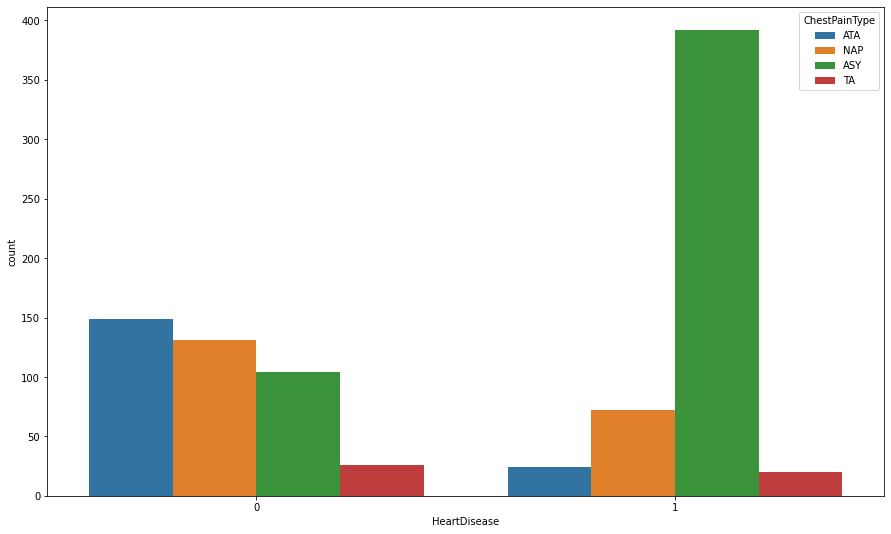

In [14]:
plt.figure(figsize=(15,9))
sns.countplot(df['HeartDisease'],hue=df['ChestPainType'])

Text(0, 0.5, 'Count')

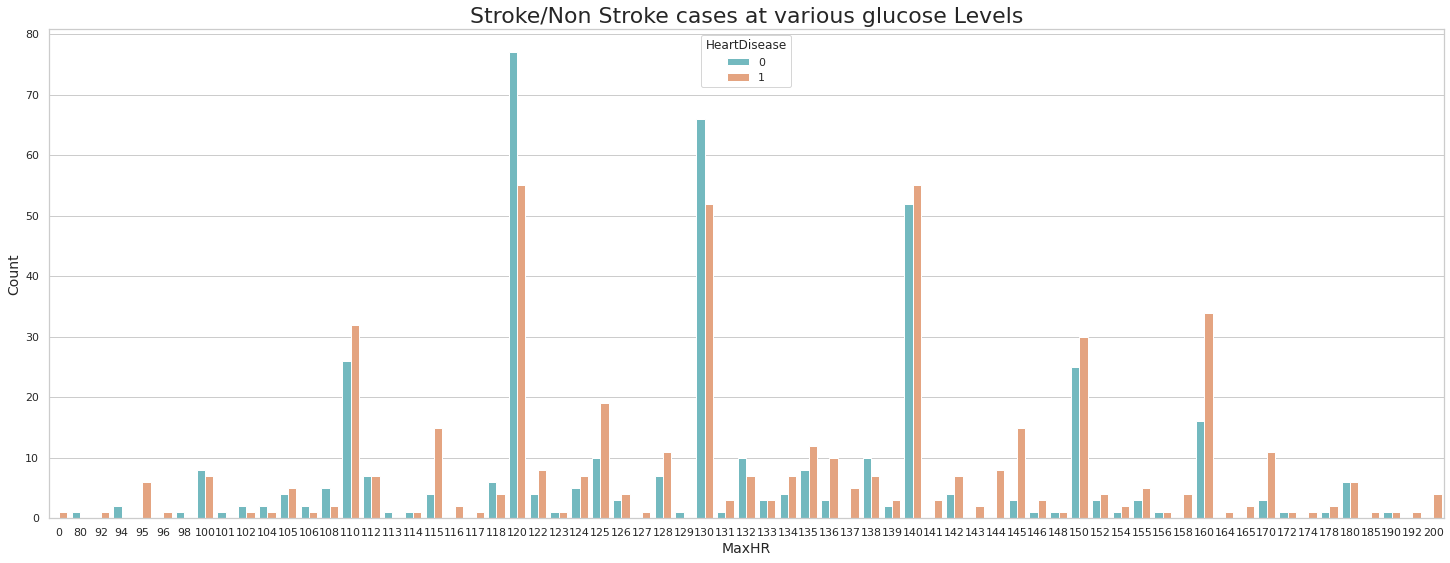

In [15]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set_theme(style='whitegrid')
ax=sns.countplot(x='RestingBP',hue='HeartDisease',palette=['#66C4CC','#F59F70'],data=df)
ax.set_title("Stroke/Non Stroke cases at various glucose Levels").set_fontsize(22)
ax.set_xlabel('MaxHR',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

In [16]:
str_only=df[df['HeartDisease']==1]
no_str_only=df[df['HeartDisease']==0]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

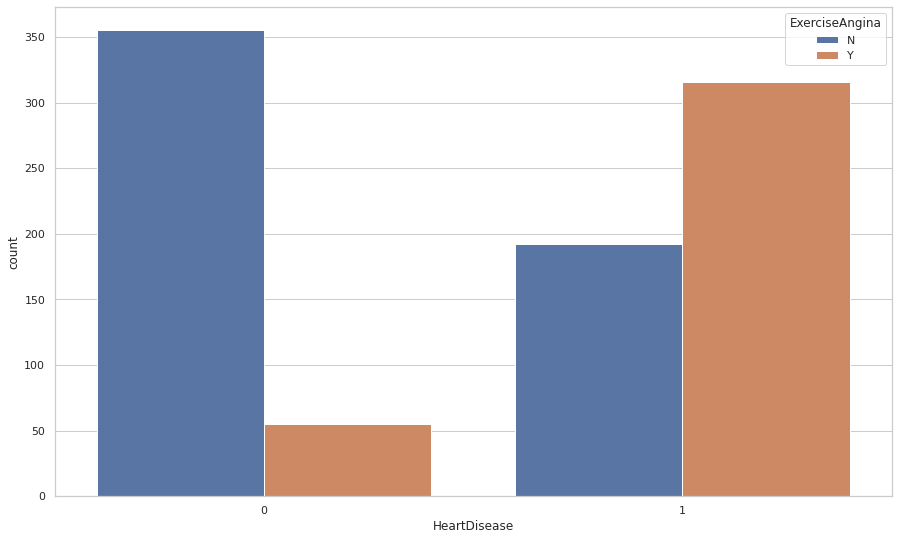

In [17]:
plt.figure(figsize=(15,9))
sns.countplot(df['HeartDisease'],hue=df['ExerciseAngina'])

In [18]:
df.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [19]:
#'O' is missing value
df['Cholesterol']=df['Cholesterol'].replace([0],np.nan)
df2=df.copy()
df2.Cholesterol.value_counts()

254.0    11
223.0    10
220.0    10
216.0     9
230.0     9
         ..
347.0     1
365.0     1
412.0     1
491.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

<Figure size 1080x720 with 0 Axes>

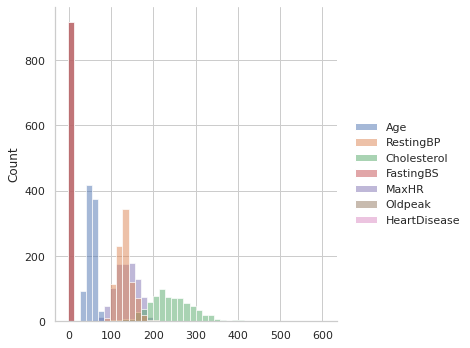

In [20]:
plt.figure(figsize=(15,10))
sns.displot(df)

In [21]:
# plt.figure(figsize=(15,10))
# sns.displot(df=df2,x= 'Cholesterol',kde=True,color='#808080')

In [22]:
df2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [23]:
#filling the missing value randomly

In [24]:
fill_list=df['Cholesterol'].dropna()
df2=df['Cholesterol'].fillna(pd.Series(np.random.choice(fill_list,size=len(df.index))))

In [25]:
df2

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [26]:
df2.value_counts()

254.0    15
263.0    13
230.0    13
220.0    13
243.0    11
         ..
518.0     1
153.0     1
316.0     1
458.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

In [27]:
df2.isnull().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

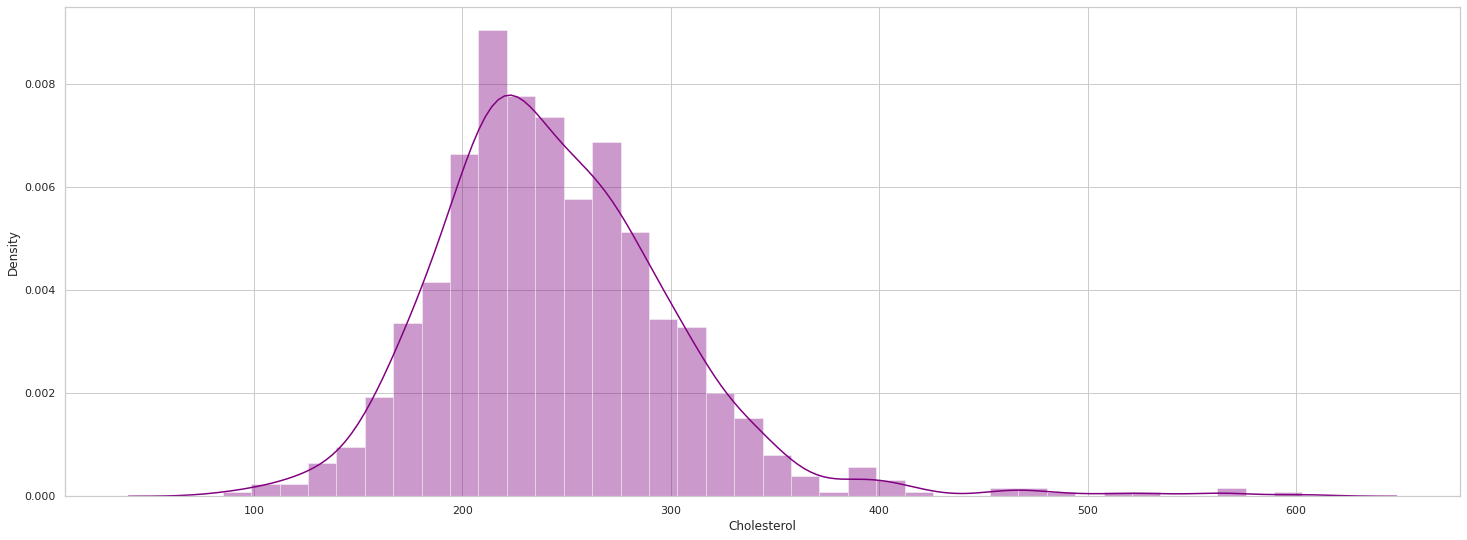

In [28]:
#checking the distribution after filling the missing value randomly
sns.distplot(df2,kde=True, color='Purple')

In [29]:
df3=df['Cholesterol'].fillna(df['Cholesterol'].mean())

In [30]:
df3

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [31]:
#checking the distribution after filling the missing value with themean

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

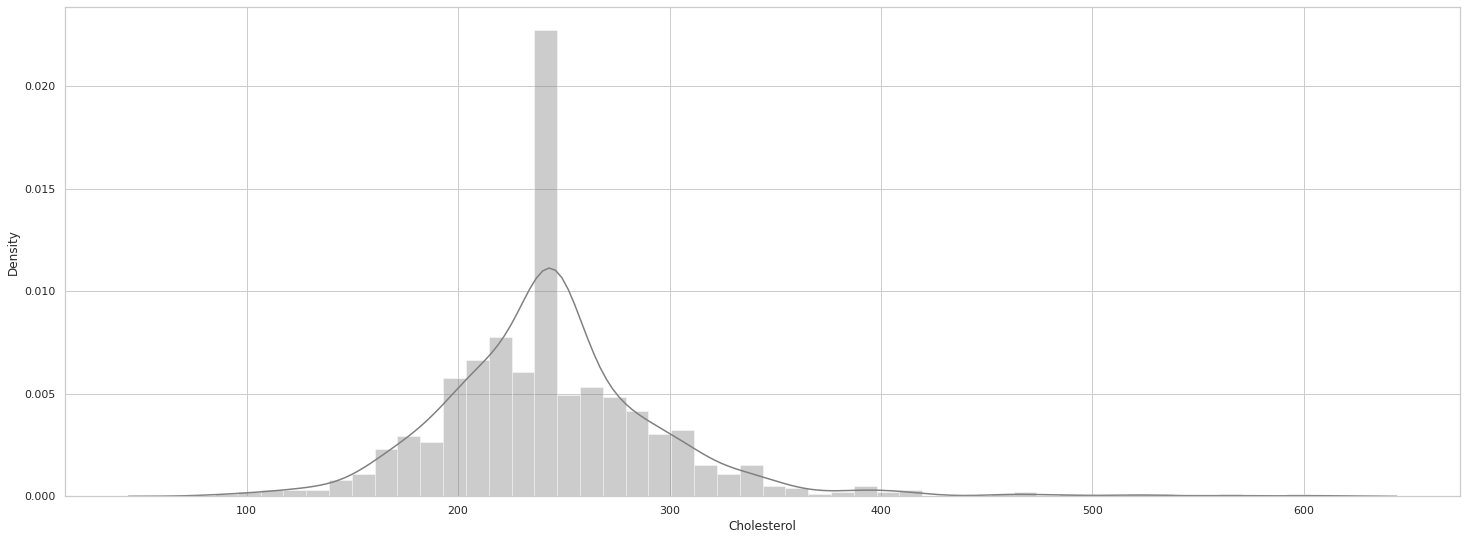

In [32]:
sns.distplot(df3,kde=True, color='grey')

In [33]:
df['Cholesterol']=df2
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [34]:
df.Cholesterol.value_counts()

254.0    15
263.0    13
230.0    13
220.0    13
243.0    11
         ..
518.0     1
153.0     1
316.0     1
458.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

Outlier

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

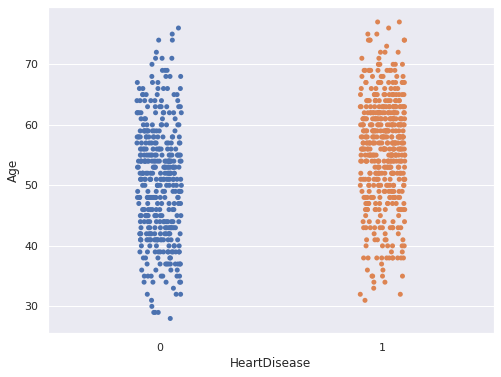

In [35]:
sns.set(rc={'figure.figsize':(8,6)})
sns.stripplot(y="Age", x="HeartDisease",data=df)

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

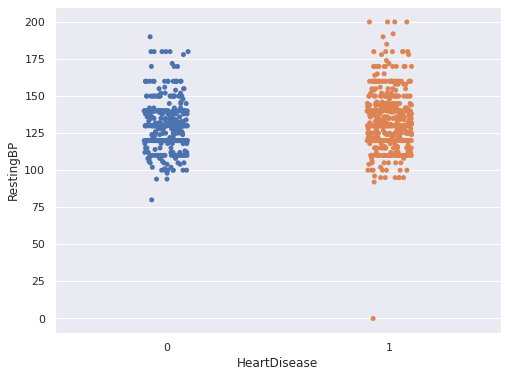

In [36]:
sns.set(rc={'figure.figsize':(8,6)})
sns.stripplot(y='RestingBP',x='HeartDisease',data=df)


In [37]:
data=df.loc[(df['RestingBP']>80)]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

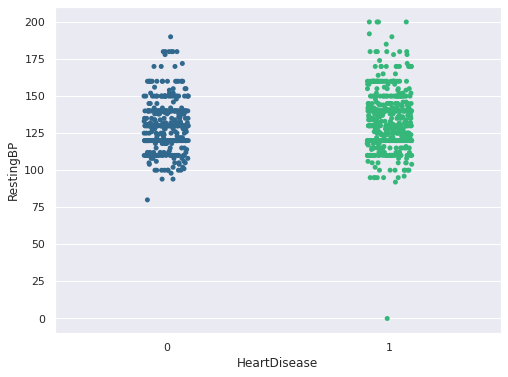

In [39]:
sns.stripplot(y='RestingBP', x='HeartDisease',data=df,palette='viridis')

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

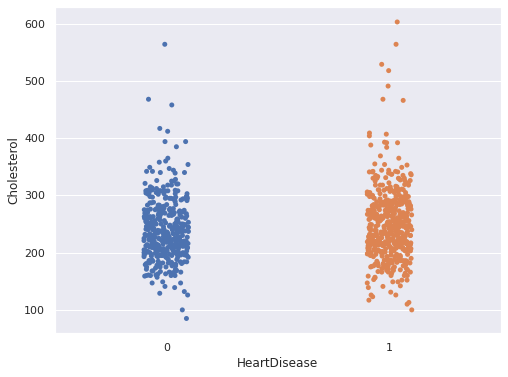

In [40]:
sns.set(rc={'figure.figsize':(8,6)})
sns.stripplot(y='Cholesterol', x='HeartDisease',data=df)

In [41]:
data=df.loc[(df['Cholesterol']<450)]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [42]:
#rechecking for outlier

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

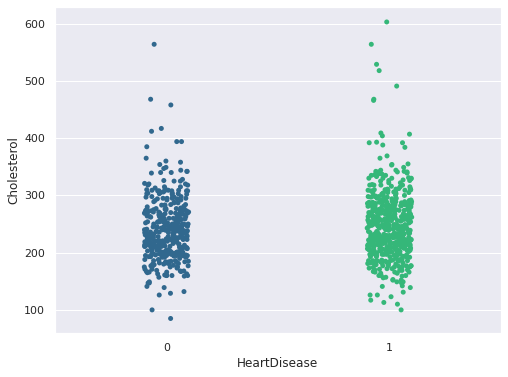

In [43]:
sns.stripplot(y='Cholesterol',x='HeartDisease',data=df,palette='viridis')

In [44]:
##Encoding

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
gender_le=LabelEncoder()
df['Sex']=gender_le.fit_transform(df['Sex'])

In [48]:
df.Sex.value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [66]:
ChestPainType_le = LabelEncoder()
df["ChestPainType"] = ChestPainType_le.fit_transform(df["ChestPainType"])
df.ChestPainType.value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [67]:
RestingECG_le = LabelEncoder()
df["RestingECG"] = RestingECG_le.fit_transform(df["RestingECG"])
df.RestingECG.value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [68]:
ExerciseAngina_le = LabelEncoder()
df["ExerciseAngina"] = ExerciseAngina_le.fit_transform(df["ExerciseAngina"])

In [69]:
df.ExerciseAngina.value_counts()


0    547
1    371
Name: ExerciseAngina, dtype: int64

In [70]:
ST_Slope_le = LabelEncoder()
df["ST_Slope"] = ST_Slope_le.fit_transform(df["ST_Slope"])

In [71]:
df.ST_Slope.value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

In [49]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [50]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 86.2 KB


<AxesSubplot:>

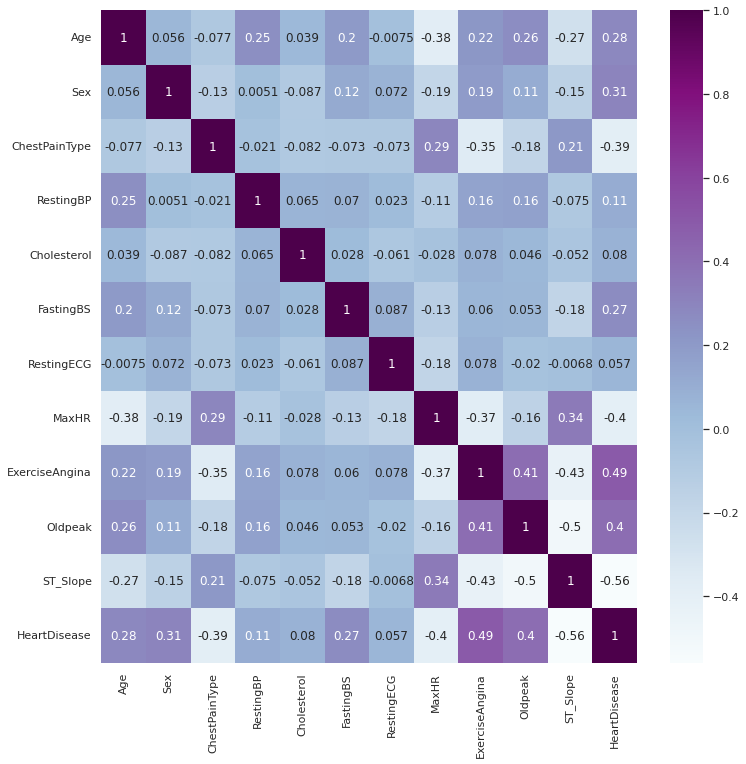

In [73]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

In [74]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [75]:
##Feature Selection

In [76]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2,f_classif

In [77]:
X=df.drop('HeartDisease',axis=1).values
y=df['HeartDisease'].values

In [78]:
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [79]:
X.shape

(918, 11)

In [80]:
y.shape

(918,)

In [81]:
FeatureSelection=SelectPercentile(score_func=f_classif,percentile=80)
X_Sel=FeatureSelection.fit_transform(X,y)

In [82]:
X_Sel.shape

(918, 8)

In [83]:
FeatureSelection.get_support()

array([ True,  True,  True, False, False,  True, False,  True,  True,
        True,  True])

In [84]:
X_Sel

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [85]:
##Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler(copy=True,with_mean=True, with_std=True)
X=sca.fit_transform(X_Sel)

In [89]:
X

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [90]:
##Split Data

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_Sel.shape

(918, 8)

In [93]:
y.shape

(918,)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

Modelling 
Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
LR=LogisticRegression()

In [97]:
LR.fit(X_train,y_train)

LogisticRegression()

In [98]:
LR.score(X_test,y_test)


0.8608695652173913

In [99]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=4)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [100]:
DT.score(X_train,y_train)

0.872093023255814

In [101]:
DT.score(X_test,y_test)

0.8260869565217391

In [102]:
##Random forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=5,max_features=8,n_jobs=6)
RF.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, max_features=8, n_jobs=6)

In [103]:
RF.score(X_train,y_train)

0.8997093023255814

In [106]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier_model=svm.SVC(kernel='linear')
classifier_model.fit(X_train,y_train)

SVC(kernel='linear')

In [107]:
classifier_model.score(X_train,y_train)

0.8590116279069767

In [108]:
###Using ANN


In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import callbacks

In [110]:
model=Sequential()

2022-11-09 20:02:33.613350: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [111]:
model.add(Dense(16,activation='swish'))
model.add(Dropout(0.25))
model.add(Dense(16,activation='swish'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [112]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [113]:
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=20)

In [114]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32, epochs=500,callbacks=[earlystopping])

2022-11-09 20:05:48.958733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
22/22 [==============================] - 2s 19ms/step - loss: 0.6568 - Accuracy: 0.6410 - val_loss: 0.6080 - val_Accuracy: 0.7609
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 0.5863 - Accuracy: 0.7384 - val_loss: 0.5456 - val_Accuracy: 0.7739
Epoch 3/500
22/22 [==============================] - 0s 8ms/step - loss: 0.5194 - Accuracy: 0.7820 - val_loss: 0.4978 - val_Accuracy: 0.7957
Epoch 4/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4828 - Accuracy: 0.8009 - val_loss: 0.4660 - val_Accuracy: 0.8043
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4595 - Accuracy: 0.8154 - val_loss: 0.4417 - val_Accuracy: 0.8174
Epoch 6/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4339 - Accuracy: 0.8154 - val_loss: 0.4250 - val_Accuracy: 0.8261
Epoch 7/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4161 - Accuracy: 0.8154 - val_loss: 0.4124 - val_Accuracy: 0.8261
Epoch 8/500


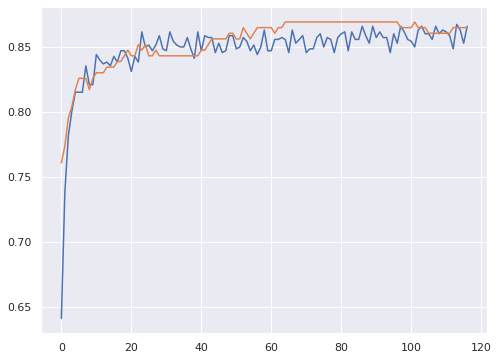

In [124]:
# summarize history for acc
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

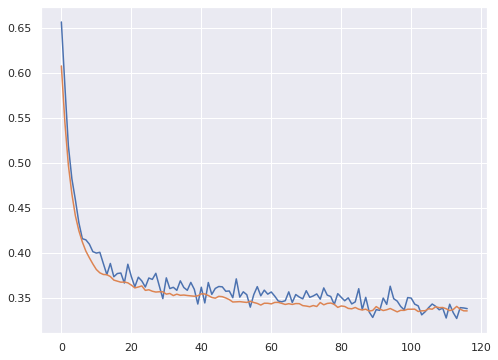

In [125]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [117]:
print("max accuracy achieved: %.2f"%(max(history.history['Accuracy'])*100),'%')
print("max val_accuracy achieved: %.2f"%(max(history.history['val_Accuracy'])*100),'%')

max accuracy achieved: 86.77 %
max val_accuracy achieved: 86.96 %


In [119]:
print('Final val_acc achieved: %.2f' %(history.history['val_Accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['Accuracy'][-1]*100), '%')

Final val_acc achieved: 86.52 %
Final acc achieved: 86.63 %


In [120]:
y_pred=model.predict(X_test)

In [121]:
y_pred=(y_pred>0.5)

In [122]:
ann_cm = confusion_matrix(y_test, y_pred)
ann_acc = round(accuracy_score(y_pred,y_test) * 100, 2)
print(ann_cm)
print(ann_acc,'%')

[[ 84  14]
 [ 17 115]]
86.52 %


In [123]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.86      0.83      0.84       101
        True       0.87      0.89      0.88       129

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230

